<a href="https://colab.research.google.com/github/Echevarriaj93/DeepLearningProjects/blob/main/CNN_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
# from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt



In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
#preprocessing required befoe images can be passed to mobilenet


def prepare_image(file):
  img_path = '/content/drive/MyDrive/Deep Learning Projects/MobileNet Images/'
  img = image.load_img(img_path + file, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array_expanded_dims = np.expand_dims(img_array, axis=0)
  return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

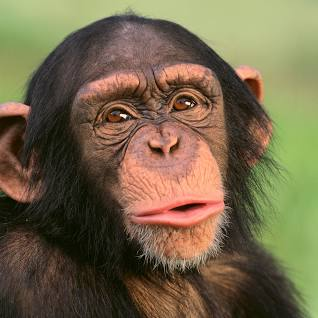

In [ ]:
from IPython.display import Image

Image(filename='/content/drive/MyDrive/Deep Learning Projects/MobileNet Images/chimp-MN.jpeg', width=300, height=200)

In [ ]:
preprocessed_image = prepare_image('chimp-MN.jpeg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 1s 622ms/step


[[('n02481823', 'chimpanzee', 0.99788034),
  ('n02487347', 'macaque', 0.0015530894),
  ('n02483708', 'siamang', 0.0002609157),
  ('n02484975', 'guenon', 0.00011867311),
  ('n02486261', 'patas', 0.00011455252)]]

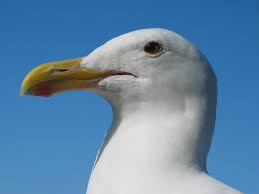

In [ ]:
Image(filename='/content/drive/MyDrive/Deep Learning Projects/MobileNet Images/6.jpeg', width=300, height=200)

In [ ]:
preprocessed_image = prepare_image('6.jpeg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 90ms/step


[[('n02058221', 'albatross', 0.99676776),
  ('n01796340', 'ptarmigan', 0.0024104048),
  ('n01855672', 'goose', 0.00026727343),
  ('n01608432', 'kite', 0.00019231587),
  ('n01614925', 'bald_eagle', 9.143444e-05)]]

##Sign Language Classification

In [ ]:
# !unzip -uq '/content/drive/MyDrive/Deep Learning Projects/Sign-Language-Digits-Dataset-master.zip' -d "/content/drive/MyDrive/Deep Learning Projects/sing_language_dataset"

In [ ]:
# Organize data into train, valid, test dirs
os.chdir('/content/drive/MyDrive/Deep Learning Projects/Sign-Language-Digits-Dataset')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [ ]:
train_path = '/content/drive/MyDrive/Deep Learning Projects/Sign-Language-Digits-Dataset/train'
valid_path = '/content/drive/MyDrive/Deep Learning Projects/Sign-Language-Digits-Dataset/valid'
test_path = '/content/drive/MyDrive/Deep Learning Projects/Sign-Language-Digits-Dataset/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
.flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
.flow_from_directory(directory=valid_path, target_size=(224,224),batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
.flow_from_directory(directory=test_path, target_size=(224,224) ,batch_size=10, shuffle=False)


Found 1240 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


##Modify Model


In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
# params = count_params(mobile)

In [ ]:
x = mobile.layers[-6].output
output= Dense(units=10, activation='softmax')(x)

In [ ]:
model = Model(inputs=mobile.input, outputs=output)

In [ ]:
for layer in model.layers[:-23]:
  layer.trainable = False

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

##Train the Model

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=10,
            verbose=2)

Epoch 1/10


ValueError: ignored